# DECISION TREE AND RANDOM FOREST

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt # ony pyplot required
sb.set() #seaborn style for graphics


In [2]:
skew_corrected_final_data = pd.read_csv("Assets/skew_Corrected_Final_data.csv")

In [3]:
# Extract Response and Predictors
y = pd.DataFrame(skew_corrected_final_data["price(USD)"])
X = pd.DataFrame(skew_corrected_final_data[["averageDifficulty","cumulative total number of coins","activeAddresses", "Daily Hash Rate(Trillions of hashes/s)"]])

In [253]:
X

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
0,16.125696,11102989.80,83564,4.278455
1,16.125696,11106339.80,81920,4.299074
2,16.125696,11109764.80,82804,4.299074
3,16.125696,11113739.80,69959,4.345594
4,16.125696,11117864.80,72103,4.402392
...,...,...,...,...
2005,29.602320,17330008.54,580054,17.698318
2006,29.602320,17331758.54,560480,17.727306
2007,29.602320,17333583.54,708285,17.769270
2008,29.602320,17335508.54,697601,17.822616


In [254]:
y

,price(USD)
0,4.934474
1,4.756861
2,4.665795
3,4.585987
4,4.726502
...,...
2005,8.776605
2006,8.776886
2007,8.778380
2008,8.754167


In [255]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1608, 1) (1608, 4)
Test Set  : (402, 1) (402, 4)


In [256]:
y_train
y_test

,price(USD)
405,6.477034
1270,6.450692
1394,7.018643
197,6.007363
366,6.125471
...,...
1,4.756861
987,6.074587
105,4.696472
1011,5.957365


In [257]:
X_train

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
213,20.377119,12059339.80,163655,8.833064
1948,29.537596,17251933.54,651131,17.763555
1746,28.685333,16857139.80,741906,16.832751
1411,26.856664,16212039.80,594463,15.082534
1736,28.586533,16837527.30,676289,16.532835
...,...,...,...,...
1357,26.543349,16108689.80,657197,14.788593
1432,26.937874,16251364.80,652269,15.182686
1128,26.016571,15663239.80,478409,14.128337
111,17.743610,11582089.80,79844,6.254432


In [258]:
X_train.describe()

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
count,1608.000000,1.608000e+03,1.608000e+03,1608.000000
mean,25.041285,1.480489e+07,4.334439e+05,13.273936
std,3.225163,1.827838e+06,2.590636e+05,3.172396
min,16.125696,1.110299e+07,4.840200e+04,4.278455
25%,24.268893,1.333061e+07,1.991680e+05,12.398354
50%,25.693079,1.521359e+07,4.427450e+05,13.875413
75%,27.254696,1.639586e+07,6.342700e+05,15.420285
max,29.639235,1.738713e+07,1.283929e+06,17.940485


<p><b>From the above data, we notice that the inpendent variables we are using to predict the price have quite a huge range of values between each other, with the range of around 10^7, hence this cause a hindrance in our ml models</b></p>
<p><b>Hence we peform scaling to tackle this possible issue </b></p>

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)


In [260]:
print (train_scaled)

[[-1.44662977 -1.50254176 -1.04172417 -1.40028322]
 [ 1.39456817  1.33918092  0.84054552  1.41565391]
 [ 1.13023172  1.12312428  1.19105105  1.12215545]
 ...
 [ 0.30249295  0.46974509  0.17362164  0.26940734]
 [-2.2634341  -1.76372378 -1.36533991 -2.21337002]
 [ 0.77837636  0.95692003  1.00321638  0.74586137]]


In [261]:
print(test_scaled)

[[-0.57491196 -1.05373007 -0.98283615 -0.60531659]
 [ 0.38302703  0.63774848  0.35178386  0.36956816]
 [ 0.54929831  0.75242777  1.03205997  0.545958  ]
 ...
 [-2.2634341  -1.77862306 -1.37162989 -2.27954953]
 [ 0.14561084  0.20417127  0.19780855  0.21199361]
 [ 0.44787858  0.69522494  0.53478809  0.43846712]]


<p><b>The target variable does not need to be scaled as these scaled values will also be able to predict the target variable, the only difference in the model will the individual weights each parameter gets.</b></p>

<p><b>We will further explore how scaling affects different types of models and if it neceassary.</b></p>

<p>Decision Tree and Random Forest</p>

In [262]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()

rf_model = RandomForestRegressor()
tree_model.fit(train_scaled, y_train)

rf_model.fit(train_scaled, y_train)


/var/folders/gk/1jp_3p2j6x50bn67_rtjv0kh0000gn/T/ipykernel_14032/384418551.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_scaled, y_train)


RandomForestRegressor()

In [263]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import  r2_score

tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse), "& R^2=",)
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))


Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0 & R^2=
Random Forest training mse =  0.00043188960830540775  & mae =  0.012581544223461222  & rmse =  0.020781953909712332


In [264]:
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))


Decision Tree test mse =  0.0046762536135353736  & mae =  0.0392057708001173  & rmse =  0.0683831383714975
Random Forest test mse =  0.0031398175654742916  & mae =  0.03333394723000598  & rmse =  0.05603407503898223


<p>Results using decision tree</p>

In [265]:
print(tree_model.predict(train_scaled))


[7.02941523 8.84993993 9.07338369 ... 6.28510384 4.77912349 8.20265503]


In [266]:
print(y_train) 

      price(USD)
213     7.029415
1948    8.849940
1746    9.073384
1411    7.070401
1736    9.221102
...          ...
1357    6.722570
1432    6.985281
1128    6.285104
111     4.779123
1564    8.202655

[1608 rows x 1 columns]


In [267]:
print(tree_model.predict(test_scaled))


[6.4511495  6.61322313 6.98404943 5.69659    6.08340542 6.47897037
 9.17998734 8.68916976 6.01805779 5.93094461 8.91444735 4.69592455
 6.100005   5.41115486 9.58798883 5.26455374 8.81508051 7.45398473
 6.36005818 9.01696313 6.38682881 6.0358163  6.73515036 8.78653765
 6.34078249 6.48385631 6.13891425 4.74336568 8.78780947 5.43359099
 9.07338369 8.9098459  4.72915617 6.73515036 5.89638434 6.54609651
 6.2521736  6.14474342 8.27291793 6.42103673 8.77529608 9.61368323
 5.47075692 6.1844169  8.81283599 5.91396236 5.95850221 6.1844169
 5.46704697 6.80505788 8.75477757 7.83409535 4.54754107 8.68916976
 6.91915011 6.07156879 9.23870429 5.47646355 9.12953479 5.89122976
 4.63278535 5.88019773 7.79827682 8.79231117 9.01451768 6.07136109
 6.82854972 4.59005655 6.4585577  6.89659321 5.45326773 5.29104096
 6.23613473 6.44468754 8.71441978 5.87812786 6.95119784 6.4315243
 5.32695341 8.13751278 5.76747689 5.43420224 6.08811474 9.27429122
 5.46843982 6.81143159 5.77768328 7.82346984 5.62221082 6.488627

In [268]:
print (y_test)

      price(USD)
405     6.477034
1270    6.450692
1394    7.018643
197     6.007363
366     6.125471
...          ...
1       4.756861
987     6.074587
105     4.696472
1011    5.957365
1340    6.867589

[402 rows x 1 columns]


<p><b>Results using random forest<b></p>

In [269]:
rf_model.predict(train_scaled)


array([6.92737881, 8.83967864, 9.06935295, ..., 6.27307065, 4.76676435,
       8.22328334])

In [270]:
print(y_train) 

      price(USD)
213     7.029415
1948    8.849940
1746    9.073384
1411    7.070401
1736    9.221102
...          ...
1357    6.722570
1432    6.985281
1128    6.285104
111     4.779123
1564    8.202655

[1608 rows x 1 columns]


In [271]:
rf_model.predict(test_scaled)


array([6.45897567, 6.49003709, 7.04347033, 5.84858125, 6.09775527,
       6.41203365, 9.13846248, 8.72864197, 6.0211675 , 5.93581004,
       8.8790358 , 4.64752979, 6.11277888, 5.44921911, 9.47501934,
       5.28169769, 8.77392297, 7.48339742, 6.35915804, 8.9011342 ,
       6.38528741, 6.03393363, 6.73166775, 8.76749906, 6.355972  ,
       6.48590721, 6.09198248, 4.746573  , 8.78219385, 5.43970644,
       9.06318492, 8.87422379, 4.72202374, 6.73873659, 5.89402542,
       6.54810781, 6.27417238, 6.11099217, 8.29784345, 6.41046773,
       8.78058069, 9.63772343, 5.4715972 , 6.17644323, 8.81393504,
       5.94145767, 5.98379961, 6.16334974, 5.48089052, 6.80896623,
       8.76674681, 7.83481111, 4.54911266, 8.72864197, 6.92490399,
       6.07832617, 9.18095692, 5.47250257, 9.12601473, 5.88295818,
       4.64889873, 5.9030223 , 7.82890287, 8.78031095, 8.84717562,
       6.06513785, 6.7153411 , 4.56671037, 6.43475885, 6.90816973,
       5.45200744, 5.25230985, 6.22869598, 6.48901237, 8.74395

In [272]:
print (y_test)

      price(USD)
405     6.477034
1270    6.450692
1394    7.018643
197     6.007363
366     6.125471
...          ...
1       4.756861
987     6.074587
105     4.696472
1011    5.957365
1340    6.867589

[402 rows x 1 columns]


<p><b>Applying linear regression in order to compare the results of linear regression with decision tree and random forest</b></p>

In [273]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(train_scaled, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
y_train_pred = linreg.predict(train_scaled)
y_test_pred = linreg.predict(test_scaled)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_scaled, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_scaled, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [6.7184442]
Coefficients of Regression 	: a =  [[-3.72900354 -0.54667512  0.77848     4.69610711]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7240793861295479
Mean Squared Error (MSE) 	: 0.5151934718927156

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7122990843245366
Mean Squared Error (MSE) 	: 0.5377715376843231



<p><b>Plotting grahps to see the accuracy of random forest as compared to linear regression</b></p>

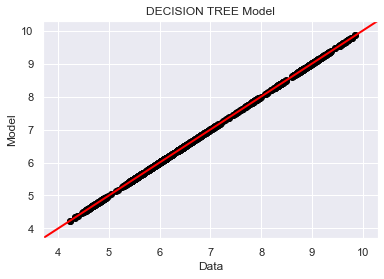

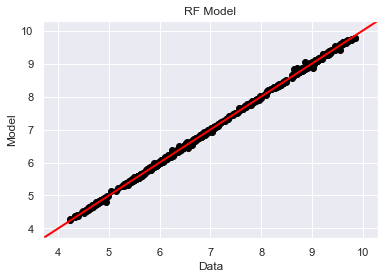

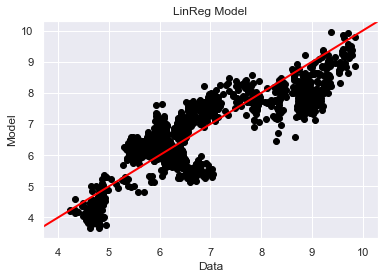

In [274]:
plt.scatter(y_train,tree_model.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('DECISION TREE Model')
plt.show()

plt.scatter(y_train,rf_model.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('RF Model')
plt.show()

plt.scatter(y_train,linreg.predict(train_scaled) ,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Model')
plt.show()

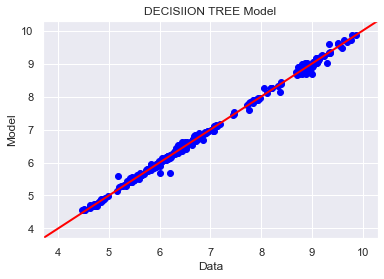

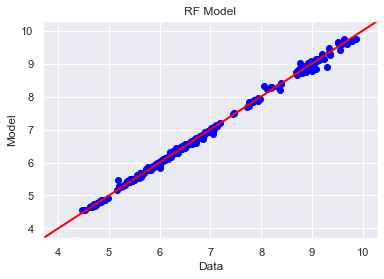

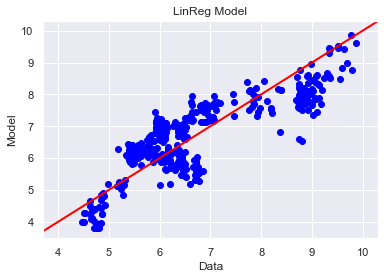

In [275]:
plt.scatter(y_test, tree_model.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('DECISIION TREE Model')
plt.show()

plt.scatter(y_test, rf_model.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('RF Model')
plt.show()

plt.scatter(y_test, linreg.predict(test_scaled),color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Model')
plt.show()

<p><b>Improving parameters on random forest</b></p>

In [278]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
    'max_depth':np.arange(2, 11),
    'n_estimators':np.arange (100,1001,100)
}
gridforest = GridSearchCV(rf_model, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_


Fitting 3 folds for each of 90 candidates, totalling 270 fits


/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dhairyarungta/opt/anaconda3/lib/python3.9/site-packages/sklearn

{'max_depth': 10, 'n_estimators': 900}

In [280]:
print ("'max_depth': 10, 'n_estimators': 900")

'max_depth': 10, 'n_estimators': 900


In [282]:
# Get features list
characteristics = X.columns
# Get the variables importances, sort them, and print the result
importances = list(rf_model.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];


Variable: cumulative total number of coins Importance: 0.88
Variable: averageDifficulty    Importance: 0.11
Variable: activeAddresses      Importance: 0.01
Variable: Daily Hash Rate(Trillions of hashes/s) Importance: 0.01


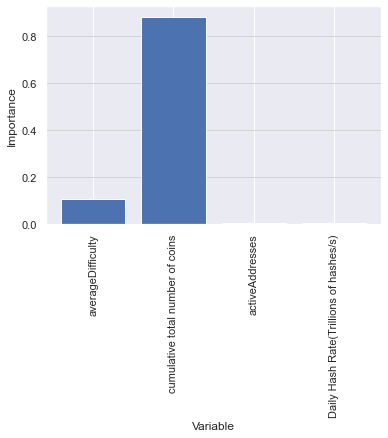

In [283]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()


<p><b>Conclusion: the significance of the variables changes everytime the model is run, it depends up which splitting factor the trees in the ensemble have chosen. </b></p>